In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import dlib
import argparse
import operator
import cv2
import glob
import io
import whatimage
import pyheif
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

In [ ]:
def face_alignment(file_path):
    image = cv2.imread(str(file_path))


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    image_norm = cv2.normalize(image, None, alpha=1,beta=500, norm_type=cv2.NORM_MINMAX)
    
    
    # detect faces in the image
    rects = detector(gray, 2)
    if len(rects) == 0:
        return
    
    faceWidth = 224
    # face rect
    rect = rects[0]
    # both eyes and nose
    # left eye: 0,1 right eye: 2, 3 nose: 4
    shape = predictor(gray, rect)
    coords = np.zeros((5, 2), dtype=np.int)
    for i in range(5):
        coords[i] = (shape.part(i).x, shape.part(i).y)
        
    LEye = coords[:2].mean(axis=0).astype(np.int)
    REye = coords[2:4].mean(axis=0).astype(np.int)
    
    # calculate angle
    dY = REye[1] - LEye[1]
    dX = REye[0] - LEye[0]
    angle = np.degrees(np.arctan2(dY, dX)) - 180
    
    LRatio, RRatio = 0.35, 0.65
    eyeDist = np.sqrt(dX ** 2 + dY ** 2)
    normDist = 0.3 * faceWidth
    scale = normDist / eyeDist
    Center = (int(LEye[0] + REye[0]) // 2, int(LEye[1] + REye[1]) // 2)
    
    M = cv2.getRotationMatrix2D(Center, angle, scale)
    
    tX = faceWidth * 0.5
    tY = faceWidth * LRatio 
    M[0, 2] += (tX - Center[0])
    M[1, 2] += (tY - Center[1])
    
    
    
    faceAligned = cv2.warpAffine(image, M, (faceWidth, faceWidth), cv2.INTER_CUBIC)
    
    new_image = np.zeros(image.shape, image.dtype)
    
    img_height = 224
    img_width = 224
    image_resized= cv2.resize(image, (img_height,img_width))
    image=np.expand_dims(image_resized,axis=0)
    
    return faceAligned

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.models import load_model

In [ ]:
model_filename = '/Users/dustint/Documents/Face Charisma Project/SuccessResnet50.h5' #'/Users/dustint/Documents/Face Charisma Project/FaceResNet50Model.h5'
new_model = load_model(model_filename)

2022-05-12 15:15:38.326141: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def predict(filename, model, to_show=False):
    proc_image = face_alignment(image_test)
    
    if to_show:
        plt.imshow(proc_image)
        plt.show()
    
    # Expand the dimension, the model expects a batch of sample(s)
    proc_image = np.expand_dims(proc_image, 0)
    pred = model.predict(proc_image)
    return pred

/var/folders/4h/7fcfpb6d4w12gg7ydf_13wr40000gn/T/ipykernel_47381/3895761830.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coords = np.zeros((5, 2), dtype=np.int)
/var/folders/4h/7fcfpb6d4w12gg7ydf_13wr40000gn/T/ipykernel_47381/3895761830.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

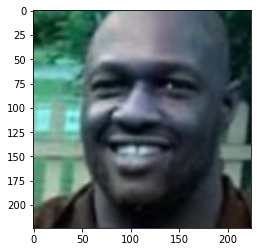

array([[0.9924785 , 0.00752146]], dtype=float32)

In [ ]:
image_test = 'rando911.png'
predict(image_test, new_model, to_show=True)